Exploratory Data Analysis (EDA) with 
IBM hr analytics attrition d dataset
# **Data** **Preparation** **and** **Cleaning** 




I use IBM Hr analytic attrition  dataset from kaggle
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("empAttrition.csv")
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [81]:
df.shape # shape the dataset


(1470, 35)

In [82]:
df.describe() # statistics of the numerical data in the data set

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From the info we come to know that the Age column has some null values, Embarked has a couple of null values and Cabin has a lot of null values

In [84]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

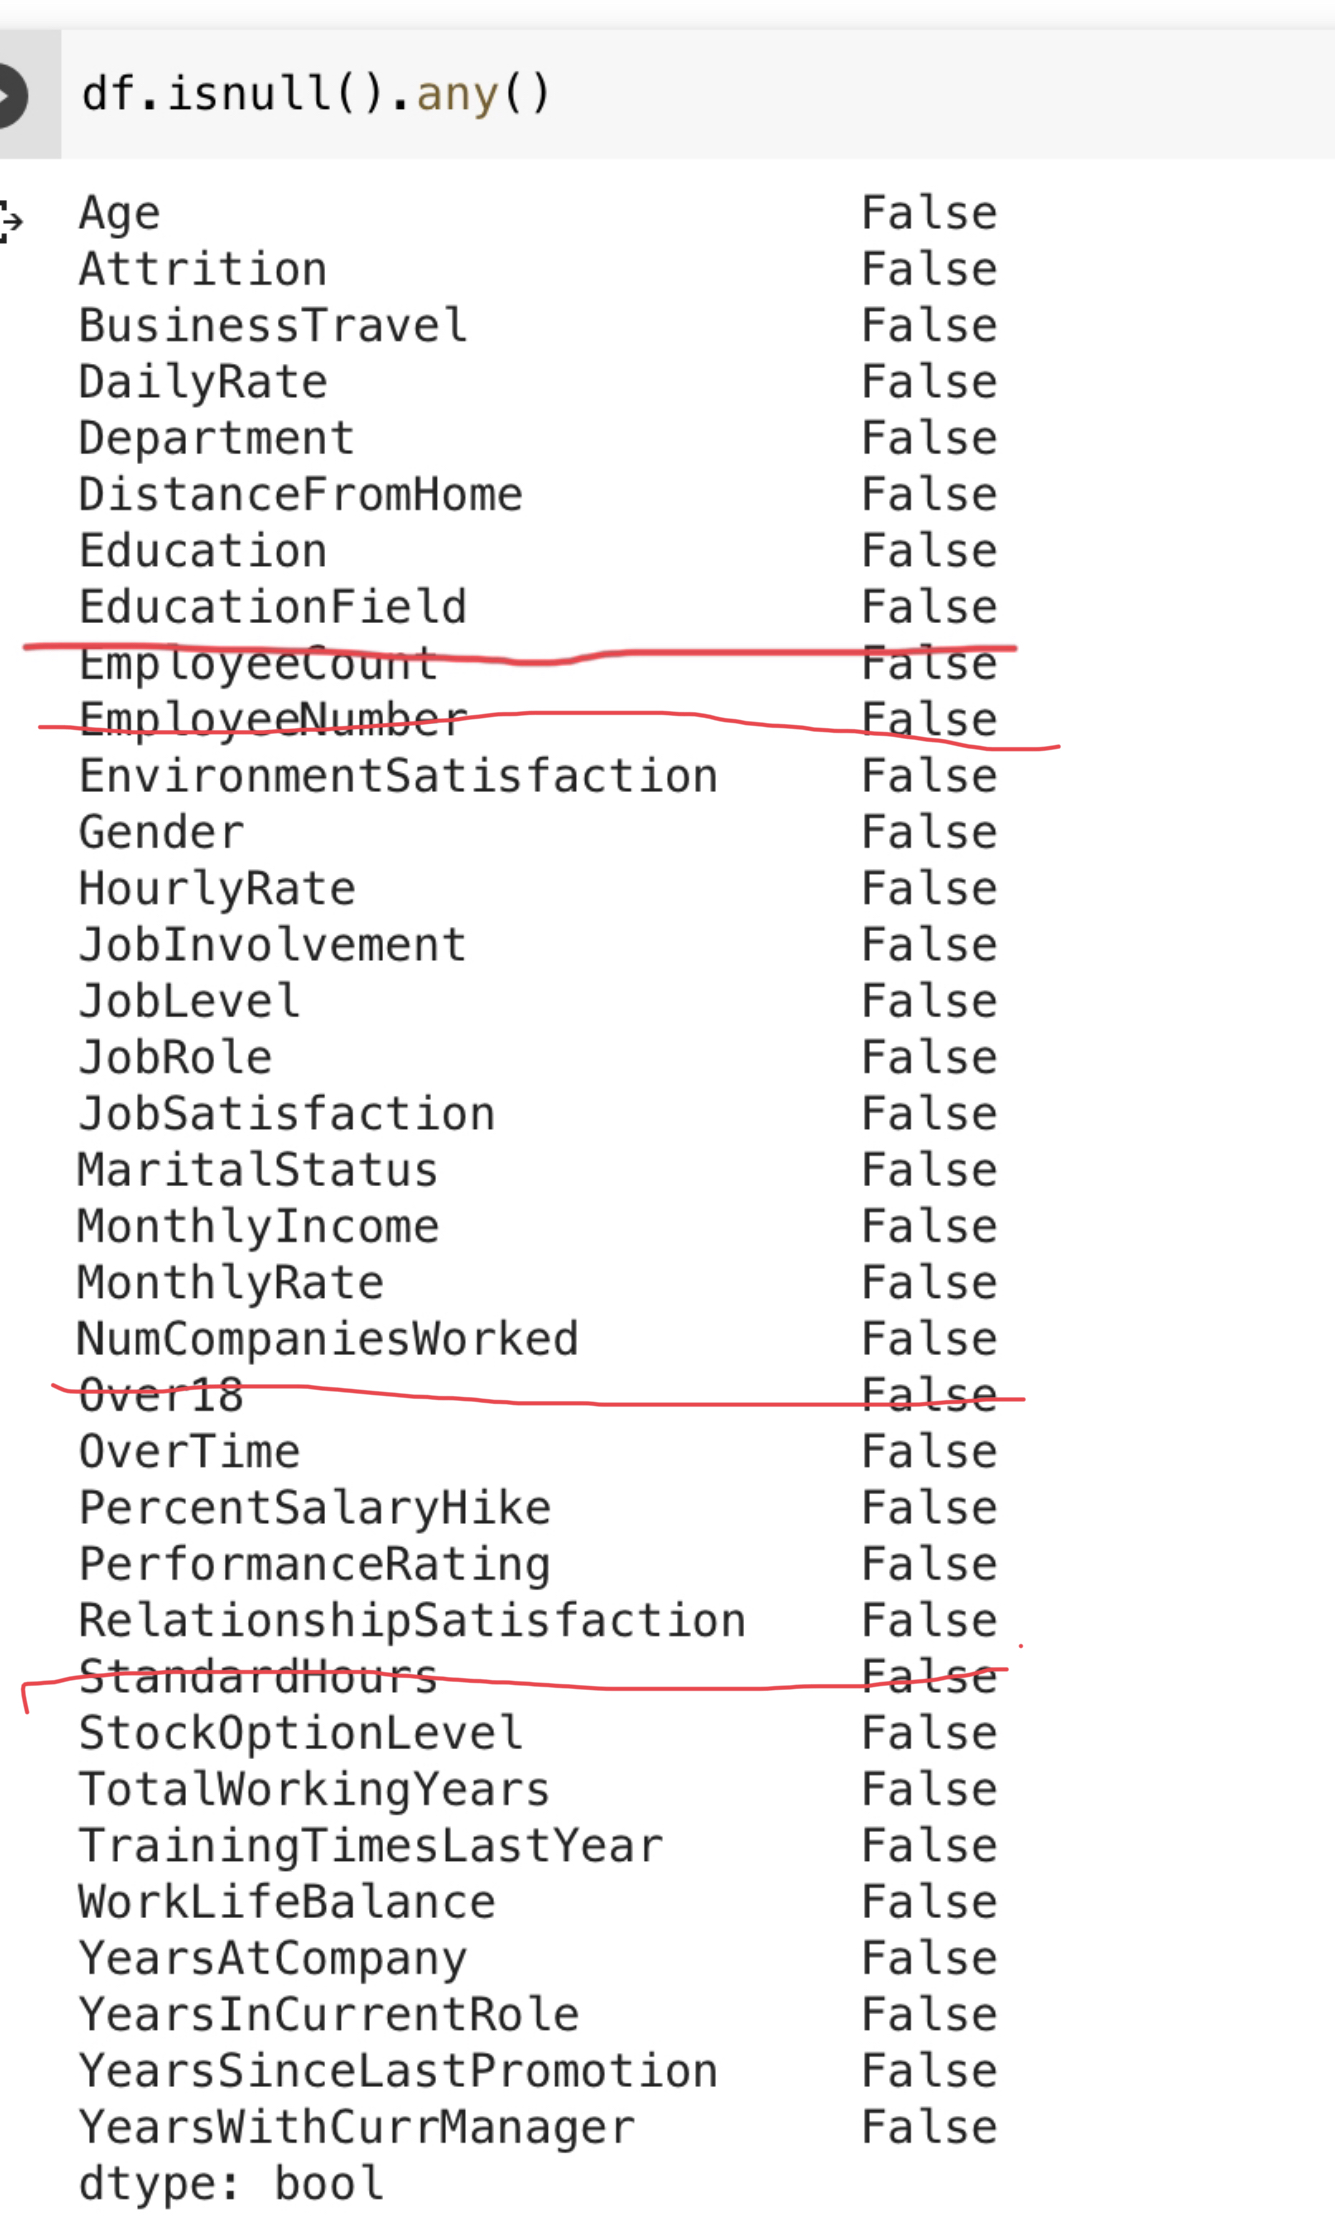

In [85]:
# Remove unnecessary columns in the copy DataFrame

clean_df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
clean_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [86]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)


In [87]:
df.head() #I check if Attrition is converted from (yes/No)to (1/0)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [88]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [89]:
header = ['Age', 'Attrition', 'Business_Travel', 'Daily_Rate',
         'Department', 'Distance_From_Home', 'Education', 'Education_Field',
         'Environment_Satisfaction', 'Gender', 
         'Hourly_Rate', 'Job_Involvement', 'Job_Level', 'Job_Role', 
         'Job_Satisfaction', 'Marital_Status', 'Monthly_Income',
         'Monthly_Rate', 'Num_Companies_Worked', 'Overtime', 
         'Percent_Salary_Hike', 'Performance_Rating', 'Relationship_Satisfaction', 
          'Stock_Option_Level','Total_Working_Years', 
          'Training_Times_Last_Year', 'Work_Life_Balance', 'Years_At_Company',
         'Years_In_Current_Role', 'Years_Since_Last_Promotion', 
         'Years_With_Current_Manager']

In [90]:
clean_df.columns = header
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Business_Travel             1470 non-null   object
 3   Daily_Rate                  1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   Distance_From_Home          1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   Education_Field             1470 non-null   object
 8   Environment_Satisfaction    1470 non-null   int64 
 9   Gender                      1470 non-null   object
 10  Hourly_Rate                 1470 non-null   int64 
 11  Job_Involvement             1470 non-null   int64 
 12  Job_Level                   1470 non-null   int64 
 13  Job_Role                    1470 non-null   obje

## Exploratory Data Analysis and Visualization

>- Find pattenrs of data through visualization and reveal hidden data trends via graphs, analysis, and charts
>- Use matplotlib and seaborn library to visualize the data
>- Find relationships between features using bar graphs, histograms, heatmaps, etc.
>- Analyze seperately both categorical and numerical features
>- Create a correlation matrix to inspect the relationships

In [91]:
import matplotlib.pyplot as plt
plt.show()

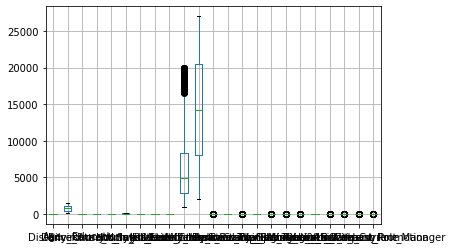

In [92]:
clean_df.boxplot() #A boxplot helps us in visualizing the data in terms of quartiles. It also identifies outliers in the dataset

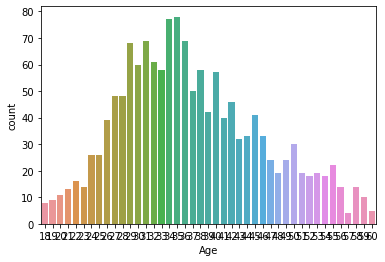

In [93]:
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.countplot(x="Age",data= clean_df)

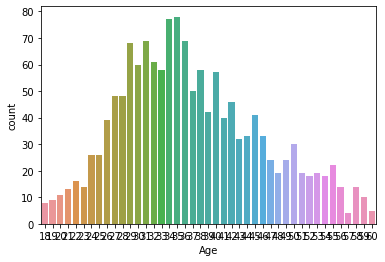

In [94]:
sns.countplot(x="Age",data=clean_df)

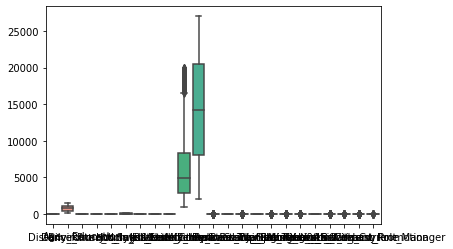

In [95]:
sns.boxplot(data=clean_df)

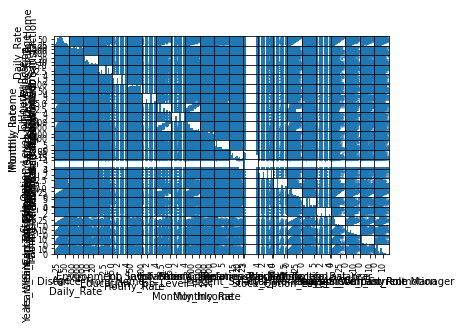

In [96]:
scatter_matrix(clean_df)
plt.show()

                                 Age  ...  Years_With_Current_Manager
Age                         1.000000  ...                    0.202089
Daily_Rate                  0.010661  ...                   -0.026363
Distance_From_Home         -0.001686  ...                    0.014406
Education                   0.208034  ...                    0.069065
Environment_Satisfaction    0.010146  ...                   -0.004999
Hourly_Rate                 0.024287  ...                   -0.020123
Job_Involvement             0.029820  ...                    0.025976
Job_Level                   0.509604  ...                    0.375281
Job_Satisfaction           -0.004892  ...                   -0.027656
Monthly_Income              0.497855  ...                    0.344079
Monthly_Rate                0.028051  ...                   -0.036746
Num_Companies_Worked        0.299635  ...                   -0.110319
Percent_Salary_Hike         0.003634  ...                   -0.011985
Performance_Rating  

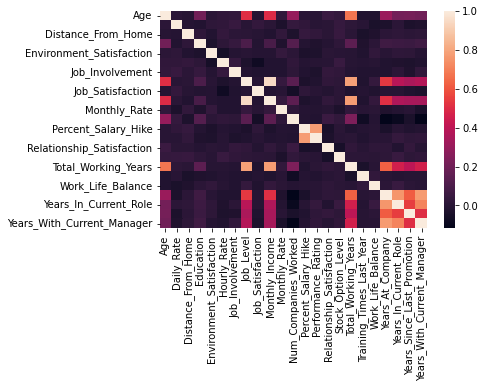

In [97]:
print(clean_df.corr())
sns.heatmap(clean_df.corr())

Data Processing

In [103]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import scipy.stats as ss
import sklearn as skl
from scipy import stats

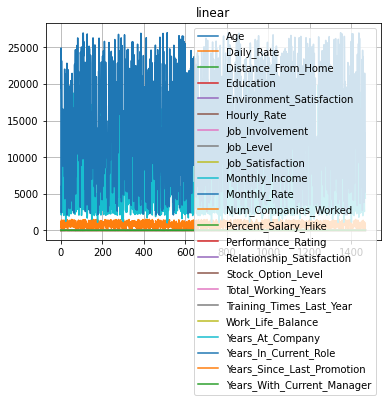

In [104]:
clean_df.interpolate().plot(title="linear",grid =1)

Visualizing all the columns that has object datatypes and has unique values less than 20



In [144]:
col_NO=[]
for column in clean_df.columns:
    if clean_df[column].dtype == object and len(clean_df[column].unique()) <= 20:
        print("{}: {}".format(column, clean_df[column].unique()))
        print(clean_df[column].value_counts())
        print("==================================================")
        col_NO.append(column)

Business_Travel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Business_Travel, dtype: int64
Department: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Education_Field: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: Education_Field, dtype: int64
Gender: ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
Job_Role: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
L

In [145]:
len(col_NO)

7

In [146]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
clean_df["Attrition"] = label.fit_transform(clean_df.Attrition)

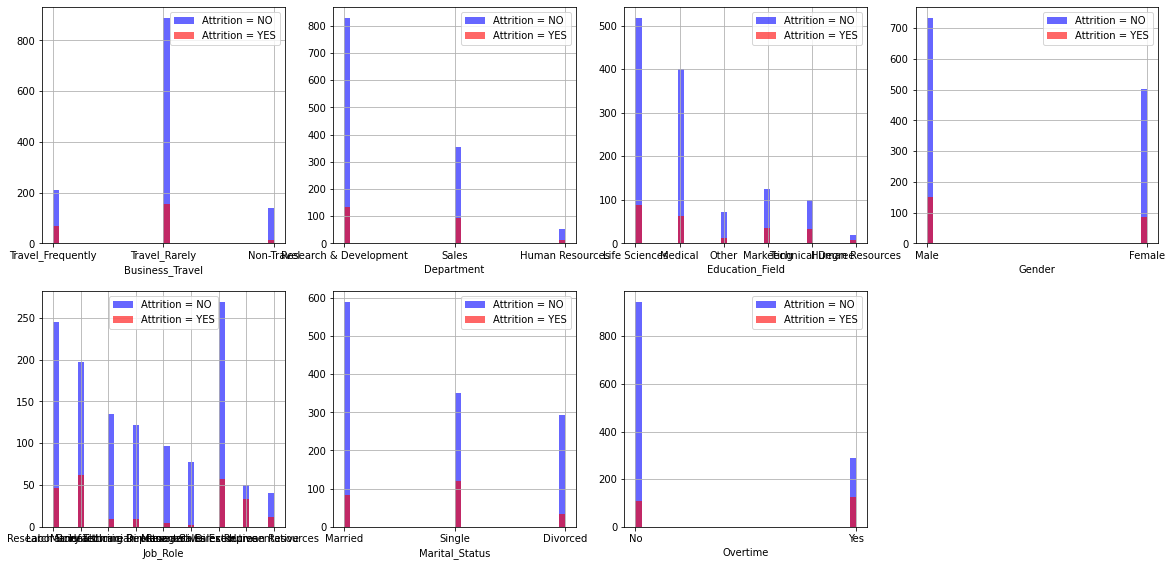

In [147]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(col_NO, 1):
    plt.subplot(4, 4, i)
    clean_df[clean_df["Attrition"] == 0][column].hist(bins=36, color='blue', label='Attrition = NO', alpha=0.6)
    clean_df[clean_df["Attrition"] == 1][column].hist(bins=36, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Visualizing all the columns that has int datatypes and has unique values more than 30**



In [148]:
numerical_col_more = []
for column in clean_df.columns:
    if clean_df[column].dtypes != object and len(clean_df[column].unique()) > 30:
        print("{}: Minimum: {}, Maximum: {}".format(column, clean_df[column].min(), clean_df[column].max()))
        numerical_col_more.append(column)
        print("--------------------------------------------------")

Age: Minimum: 18, Maximum: 60
--------------------------------------------------
Daily_Rate: Minimum: 102, Maximum: 1499
--------------------------------------------------
Hourly_Rate: Minimum: 30, Maximum: 100
--------------------------------------------------
Monthly_Income: Minimum: 1009, Maximum: 19999
--------------------------------------------------
Monthly_Rate: Minimum: 2094, Maximum: 26999
--------------------------------------------------
Total_Working_Years: Minimum: 0, Maximum: 40
--------------------------------------------------
Years_At_Company: Minimum: 0, Maximum: 40
--------------------------------------------------


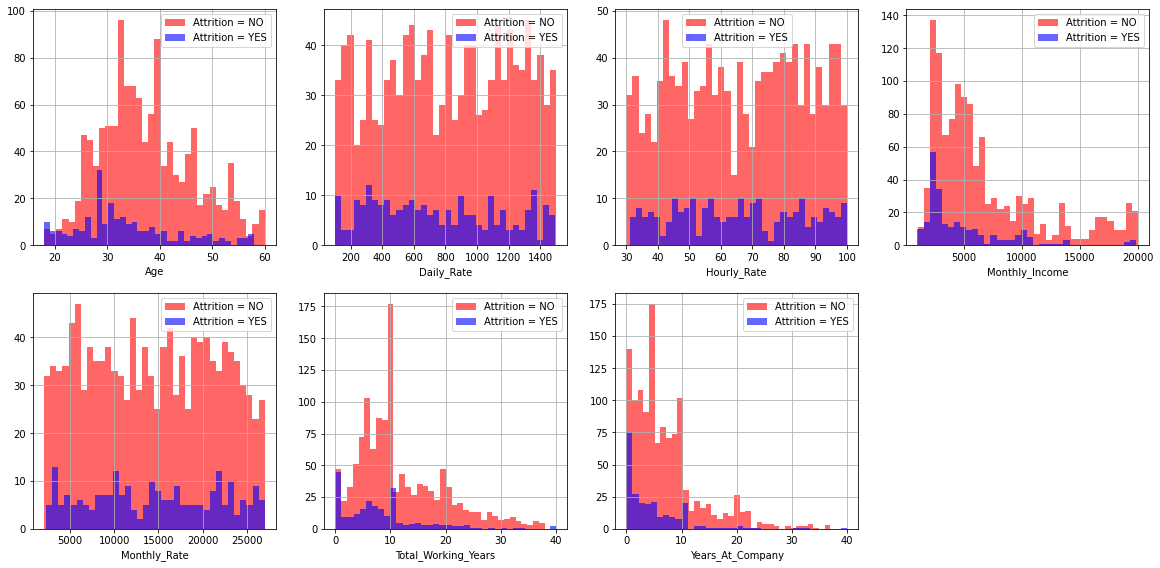

In [149]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(numerical_col_more, 1):
    plt.subplot(4, 4, i)
    clean_df[clean_df["Attrition"] == 0][column].hist(bins=36, color='red', label='Attrition = NO', alpha=0.6)
    clean_df[clean_df["Attrition"] == 1][column].hist(bins=36, color='blue', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [150]:
 clean_df.groupby(['Education']).sum() # sum of dataframe group by Education

,Age,Attrition,Daily_Rate,Distance_From_Home,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
Education,,,,,,,,,,,,,,,,,,,,,,,
1,5468,31,139811,1486,467,11056,448,305,476,958897,2585377,322,2632,540,463,125,1494,487,472,1103,666,325,616
2,10395,44,231831,2596,766,18675,767,576,781,1755914,4018485,729,4283,894,781,233,3021,803,780,1865,1104,563,1127
3,20866,99,447190,5287,1588,37548,1575,1183,1517,3727875,8055367,1543,8655,1798,1524,443,6441,1599,1561,3924,2456,1262,2341
4,15634,58,323112,3640,1053,26296,1087,849,1109,2719296,5684232,1227,6037,1251,1093,327,4949,1082,1111,3009,1759,936,1752
5,1915,5,37710,504,127,3285,136,121,128,397327,696801,138,751,153,126,39,676,144,135,401,232,130,225


In [151]:
 clean_df.groupby(['Attrition', 'Education']).mean()# the mean of datafarame group by 'Attrition', 'Education'

Age  ...  Years_With_Current_Manager
Attrition Education             ...                            
0         1          32.956835  ...                    3.841727
          2          37.126050  ...                    4.268908
          3          37.348837  ...                    4.450317
          4          39.691176  ...                    4.482353
          5          40.348837  ...                    4.790698
1         1          28.612903  ...                    2.645161
          2          35.431818  ...                    2.522727
          3          32.323232  ...                    2.383838
          4          36.879310  ...                    3.931034
          5          36.000000  ...                    3.800000

[10 rows x 22 columns]

In [177]:
clean_df.groupby(['Education', 'Attrition']).count()# the count of datafarame group by 'Attrition', 'Education'

Age  ...  Years_With_Current_Manager
Education Attrition       ...                            
1         0          139  ...                         139
          1           31  ...                          31
2         0          238  ...                         238
          1           44  ...                          44
3         0          473  ...                         473
          1           99  ...                          99
4         0          340  ...                         340
          1           58  ...                          58
5         0           43  ...                          43
          1            5  ...                           5

[10 rows x 29 columns]

How the attrition rate is affected by both MonthlyIncome based on JobRole?
We visualize MonthlyIncome and Job_Role  and the % Attritionof JobRole value_counts to Yes/No answers via a combo chart



In [169]:
# JobRole value counts correlated to Y/N Attrition
job_role_yes = clean_df['Job_Role'].value_counts()
job_role_no = clean_df['Job_Role'].value_counts()


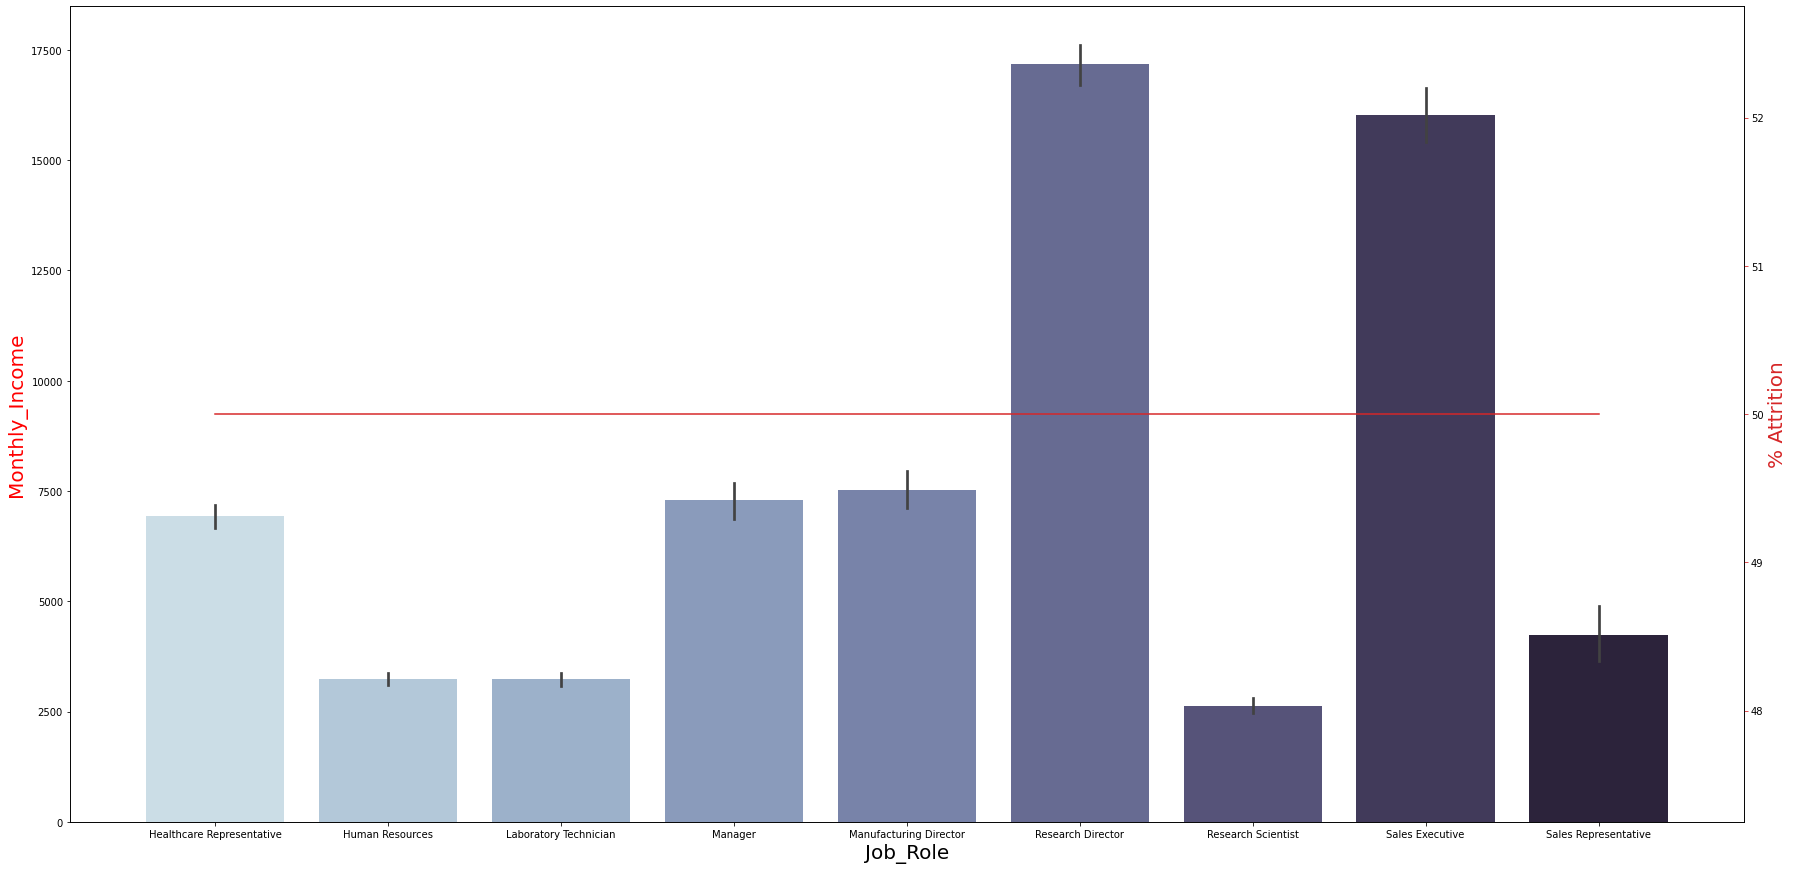

In [168]:
# Create combo chart
fig, ax1 = plt.subplots(figsize=(30,15))
color = 'red'

# Bar plot creation
ax1.set_xlabel('Job role', fontsize=20)
ax1.set_ylabel('Monthly income', fontsize=20, color=color)
ax1 = sns.barplot(x='Job_Role', y='Monthly_Income', data = clean_df, palette='ch:s=.25,rot=-.25')
ax1.tick_params(axis='y')

# Calculate and add Attrition rates
attrition_rate = pd.DataFrame(pd.crosstab(clean_df['Job_Role'],clean_df['Attrition']))
attrition_rate.insert(2, 'Attr%', value = (job_role_yes/(job_role_no + job_role_yes) *100))

# Specify that we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

# Line plot creation
ax2.set_ylabel('% Attrition', fontsize=20, color=color)
ax2 = sns.lineplot(x='Job_Role', y='Attr%', data= attrition_rate, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

plt.show()

How does promotion affect the attrition rate?

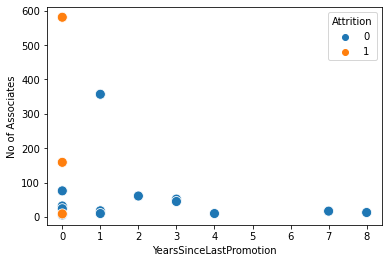

In [172]:
yearpromo_count_df=clean_df['Years_Since_Last_Promotion'].value_counts()

#Scatter plot creation
sns.scatterplot(x=clean_df.Years_Since_Last_Promotion, y=yearpromo_count_df, hue=clean_df.Attrition, s=100)
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("No of Associates");

To answer, a scatter plot will be visualized with Years_Since_Last_Promotion and No of Associates



** How does years of working affect the attrition rate?**

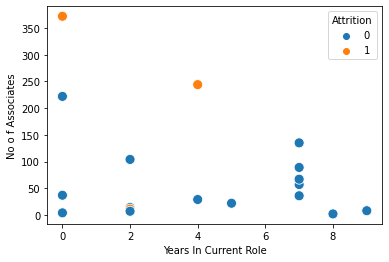

In [176]:
yearincurrentrole_count_df=clean_df['Years_In_Current_Role'].value_counts()

#Scatter plot creation
sns.scatterplot(x=clean_df.Years_In_Current_Role, y=yearincurrentrole_count_df, hue=clean_df.Attrition, s=100)
plt.xlabel("Years In Current Role")
plt.ylabel("No o f Associates");